In [24]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
def show_charged(df):
    plt.plot(df.age, df.charges, 'go')
    plt.xlabel("age")
    plt.ylabel("charges")
    plt.title("yoshga nisbatan sug'urta")
    plt.show()

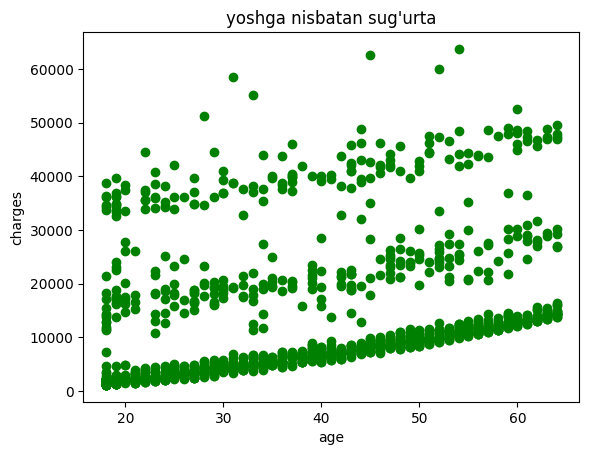

In [5]:
show_charged(df)

In [6]:
df_new = df[(df.charges < 15000) ]
df_new.shape

(980, 7)

In [7]:
df_new.loc[(df_new["age"] >= 0) & (df_new["age"] <= 30) & (df_new["charges"] > 6000), "charges"] = 3000

In [8]:
df_new[(df_new["age"] >= 20) & (df_new["age"] <= 30) & (df_new["charges"] > 6000)]

,age,sex,bmi,children,smoker,region,charges


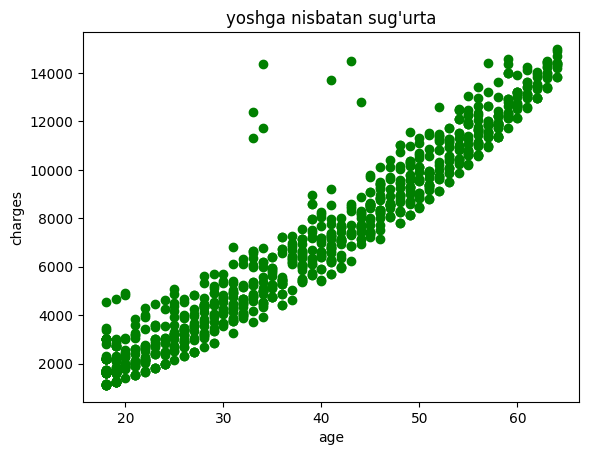

In [12]:
show_charged(df_new)

In [20]:
df_xatolik = df_new[(df_new["age"] > 30) & (df_new["age"] < 48) & (df_new["charges"] > 10200 ) ]
df_xatolik

,age,sex,bmi,children,smoker,region,charges
165,47,male,28.215,4,no,northeast,10407.08585
353,33,male,35.245,0,no,northeast,12404.87910
627,33,male,42.460,1,no,southeast,11326.71487
746,34,male,27.000,2,no,southwest,11737.84884
772,44,female,36.480,0,no,northeast,12797.20962
1128,34,male,32.800,1,no,southwest,14358.36437
1191,41,female,21.755,1,no,northeast,13725.47184
1272,43,male,25.520,5,no,southeast,14478.33015


In [21]:
df_new = df_new.drop( [165, 353, 627, 746, 772, 1128, 1191, 1272])

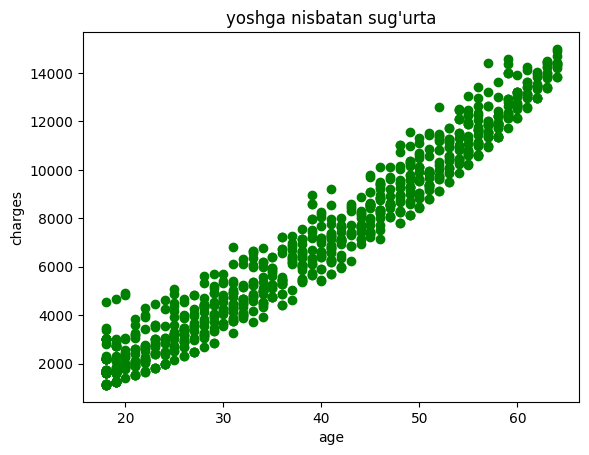

In [22]:
show_charged(df_new)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
ohe = OneHotEncoder(sparse_output=False)

In [83]:
ohe.fit(df_new[["region"]])

OneHotEncoder(sparse_output=False)

In [84]:
jins = ohe.fit_transform(df_new[["region"]])
jins.shape

(972, 4)

In [88]:
df_new.region.unique()
# df_new[["ayol","erkak"]] = jins
# df_new
df_new[["southeast","northwest","northeast", "southwest"]] = jins


In [89]:
df_new

,age,sex,bmi,children,smoker,region,charges,ayol,erkak,southeast,northwest,northeast,southwest
1,18,male,33.77,1,no,southeast,1725.5523,0.0,1.0,0.0,0.0,1.0,0.0
2,28,male,33.00,3,no,southeast,4449.4620,0.0,1.0,0.0,0.0,1.0,0.0
4,32,male,28.88,0,no,northwest,3866.8552,0.0,1.0,0.0,1.0,0.0,0.0
5,31,female,25.74,0,no,southeast,3756.6216,1.0,0.0,0.0,0.0,1.0,0.0
6,46,female,33.44,1,no,southeast,8240.5896,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850,1.0,0.0,0.0,0.0,0.0,1.0
1333,50,male,30.97,3,no,northwest,10600.5483,0.0,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.92,0,no,northeast,2205.9808,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.85,0,no,southeast,1629.8335,1.0,0.0,0.0,0.0,1.0,0.0


In [78]:
train, test = train_test_split(df_new, test_size = 0.3, random_state=42)
train.head()

,age,sex,bmi,children,smoker,region,charges,ayol,erkak
1239,25,female,42.130,1,no,southeast,3238.43570,1.0,0.0
1086,55,male,28.975,0,no,northeast,10796.35025,0.0,1.0
630,53,male,36.100,1,no,southwest,10085.84600,0.0,1.0
884,25,male,26.695,4,no,northwest,4877.98105,0.0,1.0
324,29,male,27.200,0,no,southwest,2866.09100,0.0,1.0


In [26]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(train[["age","children","bmi","ayol","erkak"]], train.charges)

LinearRegression()

In [81]:
from sklearn.metrics import mean_absolute_error
pred = lr.predict(test[['age','children','bmi',"ayol","erkak"]])

In [82]:
mean_absolute_error(test.charges, pred)

517.6899986737747